In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import LabelEncoder

In [13]:
march_path = '/content/gdrive/MyDrive/Dataset/CJ AI/march.csv'

In [37]:
march = pd.read_csv(march_path, encoding = 'utf-8')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [45]:
march = march.dropna(axis = 0, how = 'any')

In [35]:
# march = march.iloc[:,:-1]

In [46]:
march

,CORP_ID,REF_ORD_NO,BKG_NO,BKG_TYP,BKG_DATE,BKG_TIME,SHPR_CD,INV_AMT,ITEM_SEQ,ITEM_CD,BRAND_NM,ITEM_QTY,ITEM_AMT,IF_YN,ORDER_CRT_DATETIME,DLV_DV,REF_ITEM_SEQ,ORDER_IDX,ORDER_YN,DLVPREARRBRANCD,DLVPREARREMPNICKNM,DLVCLSFCD,DLVSUBCLSFCD,INS_ID,INS_DATE,INS_TIME,POST_ZONE,SPLIT_EXEC_YN,SHPR_ADDR_1,SHPR_ADDR_2,CNEE_ADDR_1,CNEE_ADDR_2
1,KX007,2021030365922951,KX007210303371080,7,20210303,35521,90001441,20900.0,1,4610261043_2,조합형옵션상품,1,20900.0,N,2.021030e+13,1.0,2021030323885721,2021030323885721,Y,6427,M09,6R67,4,iNEXBatch,20210303,131425,50.0,N,경기도,광주시,경상남도,김해시
2,KX007,2021030365924361,KX007210303371081,7,20210303,35513,90001441,37900.0,1,4936599538_1,조합형옵션상품,1,37900.0,N,2.021030e+13,1.0,2021030323887981,2021030323887981,Y,6158,L32,9Y25,0,iNEXBatch,20210303,131425,53.0,N,경기도,광주시,경상남도,거제시
3,KX007,2021030365928921,KX007210303371205,7,20210303,35608,90001542,69800.0,1,3858391637_1,조합형옵션상품,1,69800.0,N,2.021030e+13,1.0,2021030323895281,2021030323895281,Y,8909,D21,1N65,1,iNEXBatch,20210303,131425,6.0,N,경기도,광주시,서울특별시,서초구
4,KX007,2021030365930451,KX007210303370967,7,20210303,35551,90001341,73700.0,1,4631307460,단일상품,1,39800.0,N,2.021030e+13,1.0,2021030323897651,2021030323897651,Y,2777,R15,3D84,1,iNEXBatch,20210303,131425,10.0,N,경기도,광주시,경기도,김포시
5,KX007,2021030365930451,KX007210303370967,7,20210303,35551,90001341,73700.0,2,2475138283,단일상품,1,15900.0,N,2.021030e+13,1.0,2021030323897661,2021030323897661,Y,2777,R15,3D84,1,iNEXBatch,20210303,131425,10.0,N,경기도,광주시,경기도,김포시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309344,KX007,2021040163699601,KX007210401807627,7,20210331,234559,90001582,43600.0,1,4789343708_1,조합형옵션상품,1,43600.0,N,2.021033e+13,1.0,2021040124264101,2021040124264101,Y,L21A,M18,6M31,1,iNEXBatch,20210401,174255,38.0,N,경기도,안산시,경상북도,경주시
309345,KX007,2021040163729011,KX007210401807628,7,20210331,234749,90001582,26000.0,1,4624612404_16,조합형옵션상품,1,26000.0,N,2.021033e+13,1.0,2021040124312901,2021040124312901,Y,1877,J16,1P45,3,iNEXBatch,20210401,174255,5.0,N,경기도,안산시,서울특별시,송파구
309346,KX007,2021040163847431,KX007210401807225,7,20210331,235454,90001582,70800.0,1,2012852981_3,조합형옵션상품,1,70800.0,N,2.021033e+13,1.0,2021040124512081,2021040124512081,Y,6114,I73,6N85,0p,iNEXBatch,20210401,174255,49.0,N,경기도,안산시,부산광역시,사하구
309347,KX007,2021040163863411,KX007210401807629,7,20210331,235554,90001582,19500.0,1,161523952_5,조합형옵션상품,1,19500.0,N,2.021033e+13,1.0,2021040124539761,2021040124539761,Y,M53P,G50,6R69,2p,iNEXBatch,20210401,174255,46.0,N,경기도,안산시,부산광역시,북구


In [47]:
march['BRAND_NM']

1         조합형옵션상품
2         조합형옵션상품
3         조합형옵션상품
4            단일상품
5            단일상품
           ...   
309344    조합형옵션상품
309345    조합형옵션상품
309346    조합형옵션상품
309347    조합형옵션상품
309348    조합형옵션상품
Name: BRAND_NM, Length: 279851, dtype: object

In [51]:
L_encoder = LabelEncoder()
L_encoder.fit(march['BRAND_NM'])
march['BRAND_NM'] = L_encoder.transform(march['BRAND_NM'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


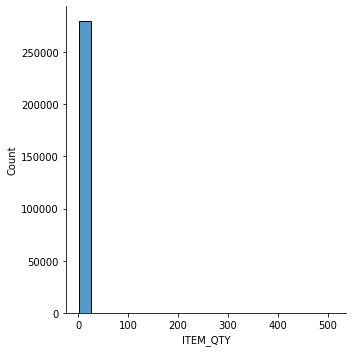

In [52]:
sns.displot(march['ITEM_QTY'])

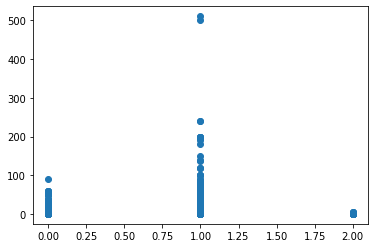

1    231851
0     47417
2       583
Name: BRAND_NM, dtype: int64


In [57]:
plt.plot(march['BRAND_NM'], march['ITEM_QTY'], 'o')
plt.show()
print(march['BRAND_NM'].value_counts()) # 적어도 3월엔 3개의 종류의 상품만 존재함.

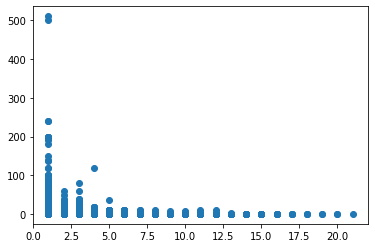

1     218001
2      36433
3      14233
4       6026
5       2435
6       1234
7        734
8        395
9        141
10        76
11        49
12        33
13        22
14        12
15         9
16         6
17         4
18         3
20         2
19         2
21         1
Name: ITEM_SEQ, dtype: int64


In [58]:
plt.plot(march['ITEM_SEQ'], march['ITEM_QTY'], 'o')
plt.show()
print(march['ITEM_SEQ'].value_counts())
# 시퀀스 값에 따라서 현저히 감소하는 추세를 확인할 수 있음!

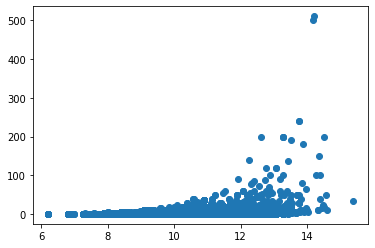

In [61]:
plt.plot(np.log(march['ITEM_AMT']), march['ITEM_QTY'], 'o')
plt.show()
# 가격 스케일이 커서 로그를 씌우고 실행시킴.
# 전반적으로 가격이 커질수록 배송할 제품의 양이 커지는 효과를 볼 수 있음.
 

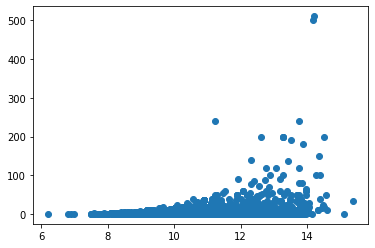

In [62]:
plt.plot(np.log(march['INV_AMT']), march['ITEM_QTY'], 'o')
plt.show()

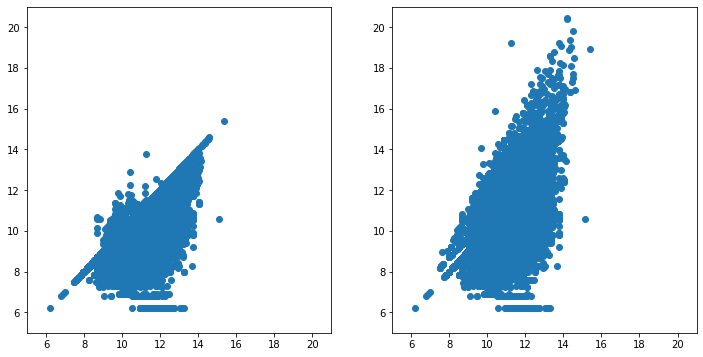

In [74]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.plot(np.log(march['INV_AMT']), np.log(march['ITEM_AMT']), 'o')
plt.xlim(5, 21)
plt.ylim(5, 21)
plt.subplot(1,2,2)
plt.plot(np.log(march['INV_AMT']), np.log(march['ITEM_AMT'] * march['ITEM_QTY']), 'o')
plt.xlim(5, 21)
plt.ylim(5, 21)
plt.show()
plt.show()
# 혹시 몰라서 주문 금액과 품목 금액에 대한 EDA를 해봤는데, 대략적으로 품목 금액은 주문 금액과 비례하는 성질을 가짐.
# 그리고 혹시나 해서 품목금액과 수량의 곱을 적용해 보았지만, 기존의 것이 더 설득력있는 분석임을 확인함.
# 그런데 주문금액과 품목 금액간 차이가 나는 이유는? 대체적으로 주문금액 > 품목금액이지만, 그렇지 않은 케이스도 존재함.

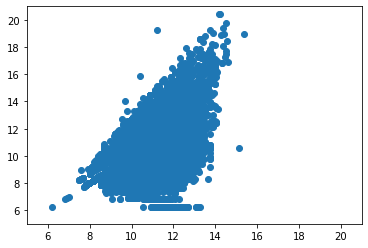

In [68]:
plt.plot(np.log(march['INV_AMT']), np.log(march['ITEM_AMT'] * march['ITEM_QTY']), 'o')
plt.xlim(5, 21)
plt.ylim(5, 21)
plt.show()
# 혹시 몰라서 주문 금액과 품목 금액에 대한 EDA를 해봤는데, 대략적으로 

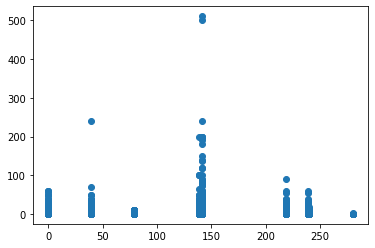

In [92]:
k = march['SHPR_CD'] - march['SHPR_CD'].min()
plt.plot(k, march['ITEM_QTY'], 'o')
# 고객사 코드를 통한 eda, 확실히 고객사 별로 데이터 수도 다르고 분포 또한 다름을 알 수 있음. 
# 특히 특정 고객사의 주문량이 폭주하는 모습을 볼 수 있다. 

In [84]:
march['ITEM_CD'].value_counts() # 주문 코드가 동일한 주문이 많다? 한번에 배송을 하는 것을 의미하는 걸까?

4658408144_1     9688
4586602884_10    3479
4586602884_11    3281
5390871219       2833
5435094301_3     2833
                 ... 
4628486056_2        1
4704686452_2        1
5012928841          1
4588099880_4        1
4496256740_42       1
Name: ITEM_CD, Length: 5320, dtype: int64

In [85]:
L_encoder = LabelEncoder()
L_encoder.fit(march['ITEM_CD'])
march['ITEM_CD'] = L_encoder.transform(march['ITEM_CD'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [86]:
march['ITEM_CD'].value_counts()

1486    9688
1223    3479
1224    3281
4692    2833
4826    2833
        ... 
2864       1
817        1
4046       1
3534       1
0          1
Name: ITEM_CD, Length: 5320, dtype: int64

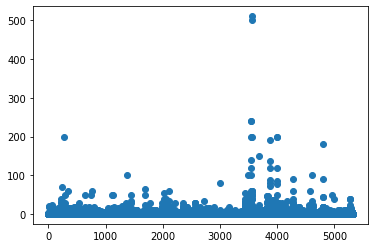

In [93]:
plt.plot(march['ITEM_CD'], march['ITEM_QTY'], 'o')
# 주문코드 별로 분포가 상이하게 다른? 모습을 볼 수 있다. 좀 더 자세히 볼 필요가 있을것 같다.

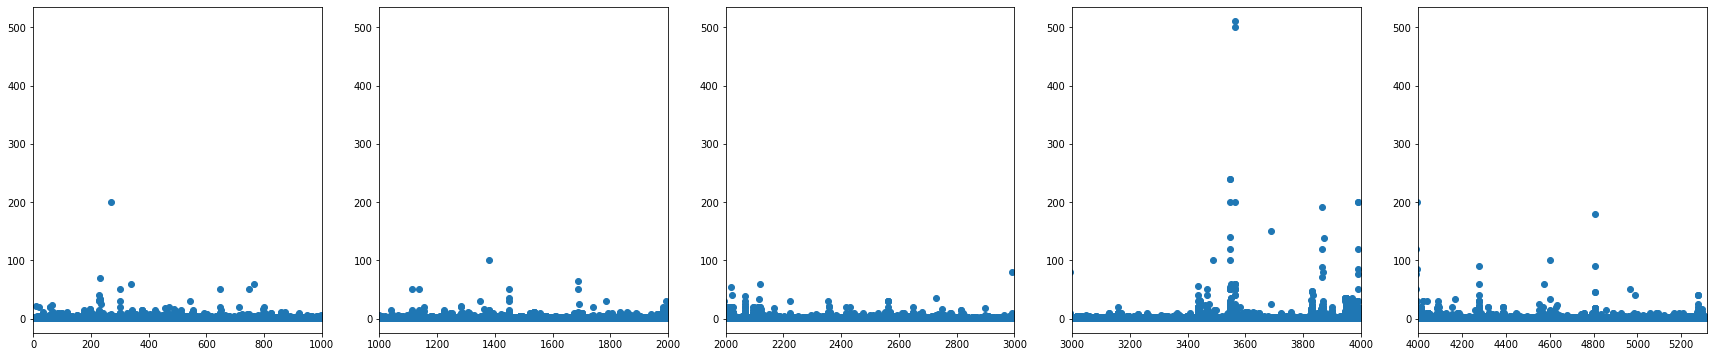

In [94]:
plt.figure(figsize = (30,6))
plt.subplot(1,5,1)
plt.plot(march['ITEM_CD'], march['ITEM_QTY'], 'o')
plt.xlim(0, 1000)
plt.subplot(1,5,2)
plt.plot(march['ITEM_CD'], march['ITEM_QTY'], 'o')
plt.xlim(1000, 2000)
plt.subplot(1,5,3)
plt.plot(march['ITEM_CD'], march['ITEM_QTY'], 'o')
plt.xlim(2000, 3000)
plt.subplot(1,5,4)
plt.plot(march['ITEM_CD'], march['ITEM_QTY'], 'o')
plt.xlim(3000, 4000)
plt.subplot(1,5,5)
plt.plot(march['ITEM_CD'], march['ITEM_QTY'], 'o')
plt.xlim(4000, march['ITEM_CD'].max())
plt.show()
# 주문 코드별 수량을 봤는데, 특정 주문 코드에서 주문이 폭발적으로 증가.
# 아마도 고객사와 연계하면 더 좋게 될지도? 
# 하지만 주문코드는 주문할 때마다 달라지지 않을까? 그러면 의미가 퇴색될 가능성이 높아질 것이다.